In [9]:
#| echo: false
from myutils.functions import question_box, list_to_html, code_block

# Previous steps

In [2]:
import pandas as pd
data_file = 'data/data.csv'
df = pd.read_csv(data_file)
cleaned_df = df.drop('VOYAGEID2',axis=1).dropna(subset=['Captives arrived at 1st port']).fillna("unknown")
cleaned_col_names = cleaned_df.columns
cleaned_df.head(10)

,Year of arrival at port of disembarkation,Voyage ID,Vessel name,Voyage itinerary imputed port where began (ptdepimp) place,Voyage itinerary imputed principal place of slave purchase (mjbyptimp),Voyage itinerary imputed principal port of slave disembarkation (mjslptimp) place,Captives arrived at 1st port,Captain's name
0,1714.0,16109,Freeke Gally,Bristol,unknown,Kingston,283.0,"Neale, Alexander"
2,1714.0,16111,Jacob,Bristol,unknown,Kingston,130.0,"Nicholls, Philip"
3,1714.0,16112,Jason Gally,Bristol,unknown,Port Royal,278.0,"Plummer, John"
5,1714.0,16114,Mercy Gally,Bristol,"Africa, port unspecified","Barbados, place unspecified",190.0,"Scott, John"
6,1714.0,16115,Mermaid Gally,Bristol,Cape Verde Islands,Kingston,72.0,"Banbury, John<br/> Copinger, James"
8,1714.0,16117,Peterborough,Bristol,"Africa, port unspecified","Barbados, place unspecified",200.0,"Shawe, John<br/> Martin, Joseph"
9,1713.0,16118,Resolution,Bristol,"Gold Coast, port unspecified","Barbados, place unspecified",255.0,"Williams, Charles"
10,1714.0,16119,Richard and William,Bristol,unknown,Port Royal,55.0,"Beckham, George<br/> Spring, Martin"
11,1713.0,16120,Rotchdale Gally,Bristol,"Africa, port unspecified","Barbados, place unspecified",96.0,"Hitchings, John"
12,1714.0,16121,Tunbridge Gally,Bristol,"Africa, port unspecified","Barbados, place unspecified",200.0,"Skinner, Peter"


In [3]:
print("Index) Column name") 
for i,name in enumerate(cleaned_df.columns): 
    print(i,")",name) 

Index) Column name
0 ) Year of arrival at port of disembarkation
1 ) Voyage ID
2 ) Vessel name
3 ) Voyage itinerary imputed port where began (ptdepimp) place
4 ) Voyage itinerary imputed principal place of slave purchase (mjbyptimp) 
5 ) Voyage itinerary imputed principal port of slave disembarkation (mjslptimp) place
6 ) Captives arrived at 1st port
7 ) Captain's name


# Data Analysis

It is finally time to ask questions to our data. Let's start with some simple ones regaring the time span of our dataset.

In [10]:
#| echo: false
questions = list_to_html([
    "What's the year of the very first and last voyage record?",
    "How many years does our data set span?",
    "How does that compare to unfiltered data?"
])
process = list_to_html([
    "Going through the Year of arrival at port of disembarkation column and look for the largest and smallest number",
    "Repeat the same procedure for the raw data set and compare"
])
tools = list_to_html([
    '<code>pandas</code> method <code>.iloc()</code>;',
    'Python functions <code>min()</code> and <code>max()</code>;',
    'Python <code>print()</code> function.'
])
code_block1 = code_block([
    'first_year = min(arrival_year)',
    'last_year = max(arrival_year)',
    'year_span = last_year-first_year'
])
code = list_to_html([
    '<code>arrival_year = cleaned_df.iloc[:,0]</code>, we use the method <code>.iloc[]</code> to select the first column \
    of the DataFrame <code>cleaned_df</code> and we store the column in the variable <code>arrival_year</code>;',
    code_block1 + ', we use the Python functions <code>min()</code> and <code>max()</code> to compute the minimum and \
    maximum values of the year column storing their values in <code>first_year</code> and <code>last_year</code>, \
    respectively. We also compute the different between these two values and store the result in <code>year_span</code>.'
])
question_box(question=questions,process=process,tools=tools, code=code)

In [11]:
arrival_year = cleaned_df.iloc[:,0]
first_year = min(arrival_year)
last_year = max(arrival_year)
year_span = last_year-first_year

print(first_year)
print(last_year)
print(year_span)

1520.0
1866.0
346.0


In [12]:
arrival_year_raw = df.iloc[:,0]
first_year_raw = min(arrival_year_raw)
last_year_raw = max(arrival_year_raw)
year_span_raw = last_year_raw-first_year_raw

print(first_year_raw)
print(last_year_raw)
print(year_span_raw)

1514.0
1866.0
352.0


In [13]:
#| echo: false
solution = 'Our cleaned data spands from 1520 to 1866, so 346. Comparing these numbers with our original, uncleaned, DataFrame\
, we can notice that the filtered data does not include the period between 1514 and 1520, so 6 years.'
question_box(solution=solution)

We can keep asking questions about numerical values. We focused on time in our last question, let's focus on the number of captives this time.

In [17]:
#| echo: false
questions = list_to_html([
    "How many captives have been disembarked between 1520 and 1866?",
    "How many captives have been disembarked on average per voyage?",
    "How many captives have been disembarked on average per year?"
    "How does these numbers change looking at the raw data?"
])
process = list_to_html([
    'Going through the "Captives arrived at 1st port" column and compute the total number of captives',
    "Divide the previous result by the number of voyages",
    'Divide the total number of captives by the number of years',
    'Adjust the previous estimate considering the average number of captives per voyage and the number of filtered rows'
])
tools = list_to_html([
    '<code>pandas</code> method <code>.iloc()</code>;',
    'Python function <code>sum()</code>;',
    'Python function <code>len()</code>;',
    'Python function <code>round()</code>;',
    'Python function <code>print()</code> .'
])
code_block1 = code_block([
'ave_cap_per_voyage = tot_captives/len(cleaned_df)',
'ave_cap_per_year = tot_captives/year_span'
])
code_block2 = code_block([
'filtered_rows = len(df)-len(cleaned_df)',
'tot_captives_ext = tot_captives + ave_cap_per_voyage*filtered_rows',
'ave_cap_per_year = tot_captives/year_span'
])
code = list_to_html([
    '<code>n_captives = cleaned_df.iloc[:,6]</code>, we apply the method <code>.iloc[]</code> to select the \
    "Captives arrived at 1st port" column and we store the column in the variable <code>n_captives</code>;',
    '<code>tot_captives = sum(n_captives)</code>, we use the Python function <code>sum()</code> to compute the sum \
    of all the values in <code>n_captives</code> and we stored the result in the variable <code>tot_captives</code>',
    code_block1 + ', we use the total number of captives just computed to calculate the average number of captives \
    per vorage (dividing it by the number of rows) and per year (dividing it by the year span). We store the result \
    in <code>ave_cap_per_voyage</code> and <code>ave_cap_per_year</code>, respectively;',
    code_block2 + ', we compute the number of filtered rows subtracting the length of our original DataFrame <code>df</code> \
    by the length of our cleaned DataFrame <code>cleaned_df</code>. Multiplying this number by the average number of \
    captives per voyage (remember that in our DataFrames each row correspond to a voyage), we obtain an estimate of the \
    number of captives that have not been considered as the corresponding data is missing and, as such, it has been filtered \
    out from our analysis. We store this estimate in the variable <code>tot_captives_ext</code>. We then adjust our estimate \
    of the number of captives per years using this value and dividing it by <code>year_span_raw</code>, the year span of \
    our original DataFrame. We store this value in the variable <code>ave_cap_per_year_adj</code>;',
    '<code>print(round(<result>))</code>, we print different results related to people using the Python function \
    <code>round()</code> that, without any other argument, approximate decimal numbers to the closest integer.'
])
question_box(question=questions,process=process,tools=tools, code=code)

In [18]:
n_captives = cleaned_df.iloc[:,6]
tot_captives = sum(n_captives;asdkjf;askldjf;aslkdjfa;slkdjf
ave_cap_per_voyage = tot_captives/len(cleaned_df)
ave_cap_per_year = tot_captives/year_span
print('Total n. of captives:',tot_captives)
print('Average captives per voyage',round(ave_cap_per_voyage))
print('Average captives per year',round(ave_cap_per_year))

Total n. of captives: 5082756.0
Average captives per voyage 276
Average captives per year 14690


In [19]:
filtered_rows = len(df)-len(cleaned_df)
tot_captives_ext = tot_captives + ave_cap_per_voyage*filtered_rows
ave_cap_per_year_adj = tot_captives_ext/year_span_raw
print('Extimated total n. of captives',round(tot_captives_ext))
print('Adjusted average captives per year', round(ave_cap_per_year_adj))

Extimated total n. of captives 9981894
Adjusted average captives per year 28358


In [20]:
#| echo: false
solution = 'Our first estimate of the total number of captives was 5 082 756 in the time period between 1520 and 1866,  \
and a corresponding average of captives per year of 14 690. However, this estimate did not take into account filtered data. \
In our data filtering we excluded many rows, so many voyages. Almost 50% of the initial voyages has been filtered our. \
We therefore computed the average of captives per voyage and estimated the number of filtered out captives. The result is \
a number that almost double (as expected) our previous estimate: 9 981 894 people, with an average of 28 358 people traded \
per year.'
question_box(solution=solution)

So far we computed numbers, but data can be most effectively described using visualization. In our DataFrame we have information about three different locations: the place where the voyage started, the principal port of slave purchase, and the principal port of slave disembarkation. Let's have a closer look at these locations.

In [38]:
#| echo: false
questions = list_to_html([
    "What is the town where most of the voyages started?",
    "Can we sort town according to the number of voyages that started there?",
    "How about the other two locations, place of slave purchase and disembarkation?"
])
process = list_to_html([
    'Go through the "Voyage itinerary imputed port where began (ptdepimp) place" column and count how many times \
    a town name occurs;',
    'Repeat this procedure for all the towns;',
    'Sort towns according to how many times their names show up;',
    'Make a plot with town names on the vertical axis and how many times they have been starting point for voyages in \
    the orizontal axis;',
    'Repeat the same procedure for the other two locations: port of slave purchase and disembarkation.'
    
])
tools = list_to_html([
    '<code>pandas</code> method <code>.iloc[]</code>',
    '<code>pandas</code> method <code>.value_counts()</code>',
    'Python package <code>seaborn</code>;',
    'Python package <code>matplotlib.pyplot</code>;',
    '<code>matplotlib.pyplot</code> function <code>.subplots()</code>;',
    '<code>seaborn</code> function <code>.barplot()</code>'
])
code = list_to_html([
    '<code>start_port = cleaned_df.iloc[:,3]</code>, we use the <code>pandas</code> method <code>.iloc[]</code> to \
    select our target column. In this case it is "Voyage itinerary imputed port where began (ptdepimp) place", the \
    fourth column of our DataFrame (Python index 3). We store this column in the variable <code>start_port</code>;',
    
    '<code>start_port_counts = start_port.value_counts()</code>, we want to count how many times a certain town name \
    occurs in our column and the <code>pandas</code> method <code>.value_counts()</code> does exactly this. After \
    applying the method, we obtain a <code>pandas</code> DataFrame with a single column (a Series) having as index the \
    name of the town and as value the number of times that town shows up in the column <code>start_port</code>. We store \
    this result in <code>start_port_counts</code>;',

    '<code>start_port_counts</code>, we display the content of the variable <code>start_port_counts</code> on the screen;',
    
    '<code>import seaborn as sns</code>, we import the Python package <code>seaborn</code> and we give it the alias \
    <code>sns</code>. This means that, from now own, if we want to use a certain function belonging to this package, we \
    will call it using: <code>sns.<function_name>()</code>;',
    
    '<code>import matplotlib.pyplot as plt</code>, we import the Python package <code>matplotlib.pyplot</code> and we \
    give it the alias <code>plt</code>;',

    '<code>fig, new_ax = plt.subplots(nrows=1,ncols=1,figsize=(8,8))</code>, we use the <code>matplotlib.pyplot</code> \
    function <code>.subplots()</code> to initialise an empty plot. <code>.subplots()</code> it is generally used to create \
    a grid of plots and its first two arguments (<code>nrows</code> and <code>ncols</code>) specify the number of rows \
    and columns in this grid. In our case, we just want a single plot, therefore we specify a grid having only one column \
    and one row. The parameter <code>figsize</code> specifies the size of the figure in inches. In our case \
    (<code>(8, 8)</code>) it will be 8 inches wide and 8 inches high. This function returns two different objects: a \
    Figure and an Axes. The Figure is the white space where we are going to put our plot, it is our plot container. The \
    Axes, despite its name, it is the plot itself. We did not initialise our plot yet, so the Axes is empty, but this is \
    one of the standard procedure in Python: first create the space where to plot, then plot the data. Figure and Axes are \
    stored in the variables <code>fig</code> and <code>new_ax</code>, respectively;',
    
    '<code>filter = start_port_counts > 50</code>, if we plot ALL our data, the plot is going to look overcrowded. For this \
    reason, we can specify a threeshold and plotting only towns that appear a number of times that is higher than our \
    threeshold. In our case, and in the specific case of this plot, this number will be 50. \
    <code>start_port_counts > 50</code> is a Python <em>condition</em>, it basically creates an array with the same size \
    and features of <code>start_port_counts</code> containing boolean values (True and False) instead of numerical values. \
    When True and when False? If a value in <code>start_port_counts</code> is higher than 50, the corresponding boolean \
    value will be True, otherwise it will be False. We store this boolean array in the variable <code>filter</code> as \
    this can used as a mask or filter to filter out from an array with the same dimention and features only those values \
    corresponding to True;',
    
    '<code>sns.barplot(ax=ax,x=start_port_counts[filter],y=start_port_counts.index[filter])</code>, we use the \
    <code>seaborn</code> function <code>.barplot()</code> to create (guess what??) a barplot. The barplot will be \
    located in our just created Axes object, this is specified using the argument <code>ax=new_ax</code>. We need to \
    specify which data to plot in the horizontal <code>x</code> and <code>y</code> axis. We want to plot town name in the \
    y axis and town name counts in the y axis. We also want to display only those data with more than 50 counts. We can \
    specify this with <code>x=start_port_counts[filter]</code> and <code>y=start_port_counts.index[filter]</code>, as the \
    town name is specified in the <code>start_port_counts</code> index and the town counts in the \
    <code>start_port_counts</code> values.',
    
    'We repeat the same procedure for the fifth and sixth column of our DataFrame'
])
question_box(question=questions,process=process,tools=tools, code=code)

In [21]:
start_port = cleaned_df.iloc[:,3]
start_port_counts = start_port.value_counts()
print(type(start_port_counts))
start_port_counts

<class 'pandas.core.series.Series'>


Voyage itinerary imputed port where began (ptdepimp) place
Liverpool                       3227
unknown                         2005
London                          1874
Bahia, place unspecified        1815
Rio de Janeiro                  1464
                                ... 
Mangaratiba                        1
Mediterranean coast (France)       1
Canasí                             1
Santa Catarina                     1
Portland                           1
Name: count, Length: 176, dtype: int64

<Axes: xlabel='count', ylabel='Voyage itinerary imputed port where began (ptdepimp) place'>

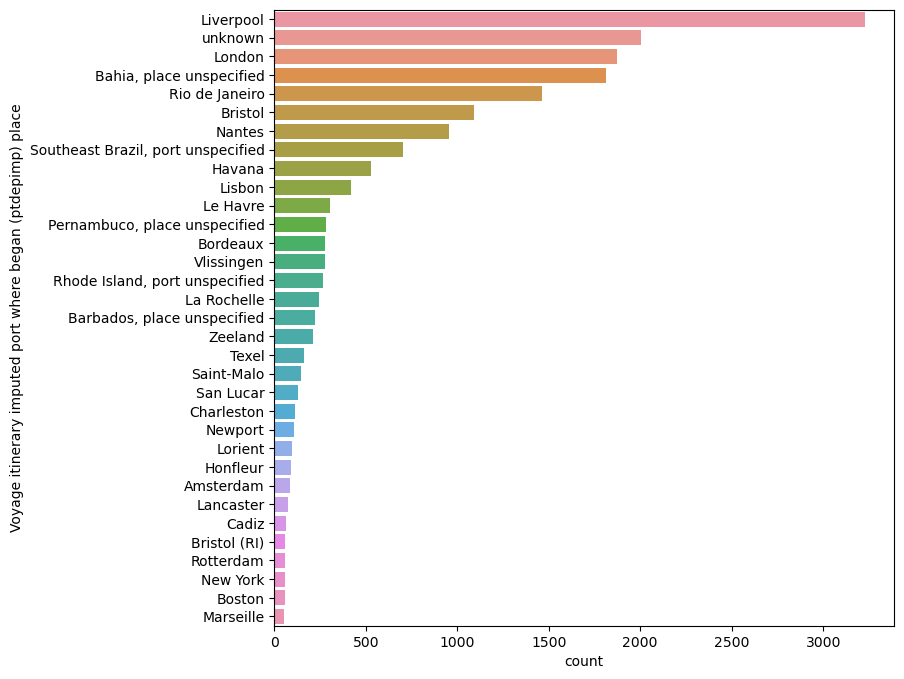

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, new_ax = plt.subplots(nrows=1,ncols=1,figsize=(8,8))
filter = start_port_counts > 50
sns.barplot(ax=ax,x=start_port_counts[filter],y=start_port_counts.index[filter])

In [34]:
main_pur_port = cleaned_df.iloc[:,4]
main_pur_counts = main_pur_port.value_counts()
main_pur_counts

Voyage itinerary imputed principal place of slave purchase (mjbyptimp) 
Africa, port unspecified                                3177
Luanda                                                  1447
West Central Africa and St. Helena, port unspecified    1139
Bonny                                                    853
Gold Coast, port unspecified                             787
                                                        ... 
Petit Mesurado                                             1
Eva                                                        1
Pokesoe (Princes Town)                                     1
Sassandra                                                  1
Sugary (Siekere)                                           1
Name: count, Length: 161, dtype: int64

<Axes: xlabel='count', ylabel='Voyage itinerary imputed principal place of slave purchase (mjbyptimp) '>

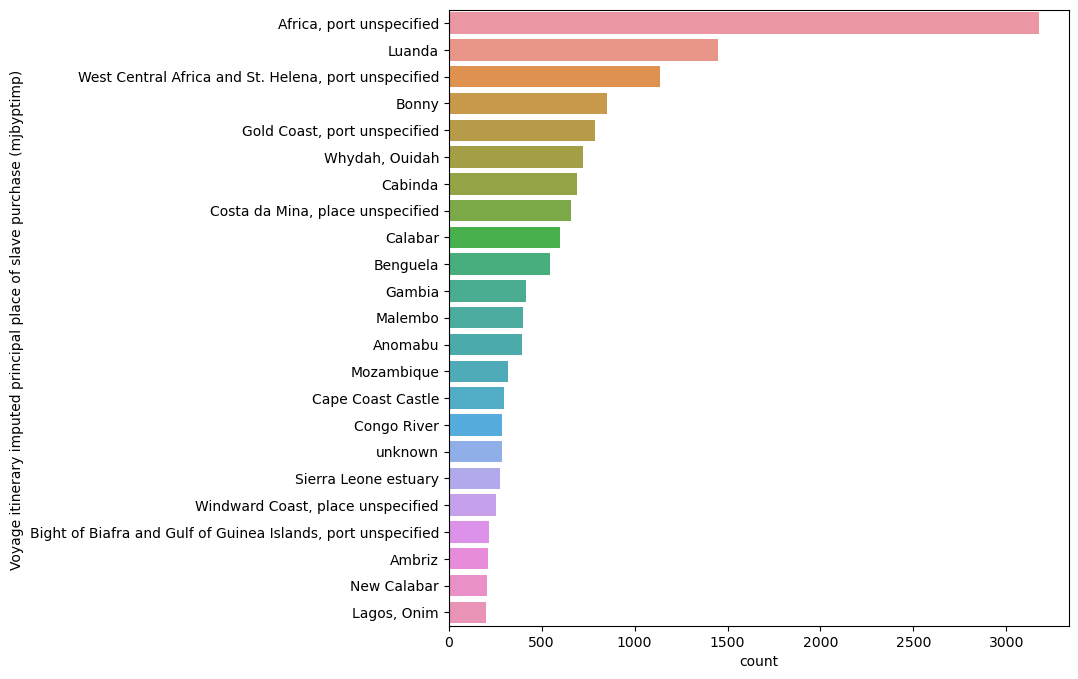

In [35]:
fig, ax = plt.subplots(1,1,figsize=(8,8))
filter = main_pur_counts > 200
sns.barplot(ax=ax,x=main_pur_counts[filter],y=main_pur_counts.index[filter])

In [36]:
main_dis_port = cleaned_df.iloc[:,5]
main_dis_counts = main_dis_port.value_counts()
main_dis_counts

Voyage itinerary imputed principal port of slave disembarkation (mjslptimp) place
Bahia, place unspecified       1720
Rio de Janeiro                 1651
Kingston                       1576
Barbados, place unspecified    1524
Havana                          893
                               ... 
France, place unspecified         1
Santa Marta                       1
Dois Rios                         1
Maceió                            1
Bonny                             1
Name: count, Length: 240, dtype: int64

<Axes: xlabel='count', ylabel='Voyage itinerary imputed principal port of slave disembarkation (mjslptimp) place'>

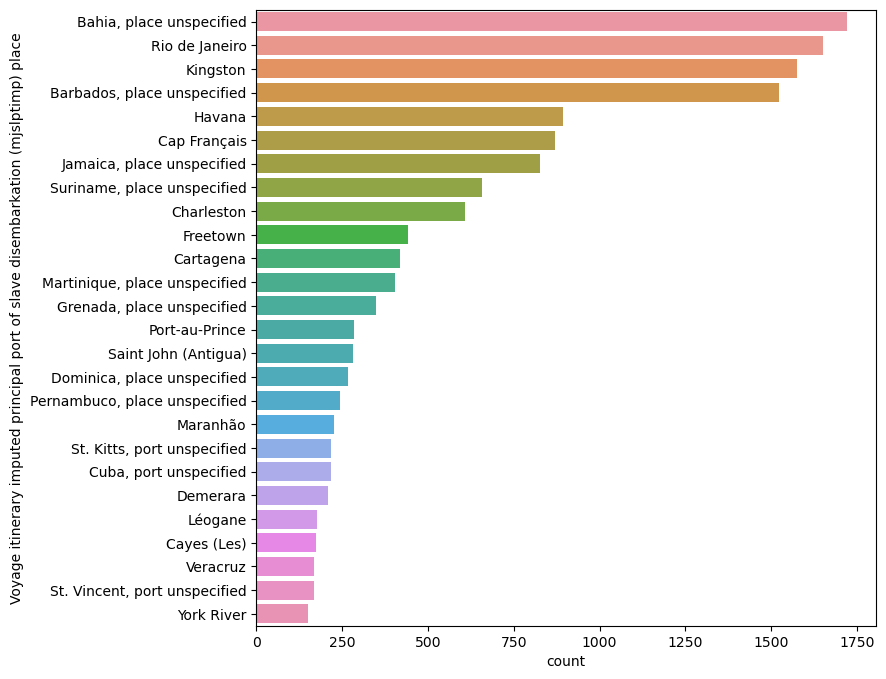

In [37]:
fig, ax = plt.subplots(1,1,figsize=(8,8))
filter = main_dis_counts > 150
sns.barplot(ax=ax,x=main_dis_counts[filter],y=main_dis_counts.index[filter])

In [40]:
#| echo: false
solution = 'The ports where most of the voyages took place are Liverpool and London (with a considerable percent being \
unkown). Most of the places where slaves have been purchased remain unkown, the second most occuring purchanse place is \
Luanda (mid Africa). The most frequent places of disimbarkation are Bahia and Rio de Janeiro, on the opposite side of the \
Atlantic Ocean at a similar latitude.'
question_box(solution=solution)

Let's try to make now a different time ov visualization, a time series, i.e. a plot where we see how parameters change over time

In [61]:
#| echo: false
question = "How does the total number of disembarkated captives change over time?"
process = list_to_html([
    'Consider the data set columns containing information about time and number of captives',
    'Group data rows by year',
    'Sum the number of captives per year',
    'Make a plot with years (time) on the x axis and number of captives on the y axis',
    'Locate the minimum and the maximum of captives per year'
])
tools = list_to_html([
    '<code>pandas</code> method <code>.groupby()</code>;',
    '<code>parnas</code> method <code>.mean()</code>;',
    'Python package <code>matplotlib.pyplot</code>;',
    'Python package <code>seaborn</code>;',
    '<code>matplotlib.pyplot</code> function <code>.subplots()</code>;',
    '<code>seaborn</code> function <code>.lineplot()</code>;',
    '<code>matplotlib.pyplot</code> function <code>.grid()</code>;',
    '<code>pandas</code> method <code>.idxmin()</code>;',
    '<code>pandas</code> method <code>.idxmax()</code>;',
    'Python function <code>print()</code>'
])
code_block1 = code_block([
    'col_to_group = "Year of arrival at port of disembarkation"',
    'col_to_sum = "Captives arrived at 1st port"'
])
code_block2 = code_block([
    'max_index = df_per_year.idxmax()',
    'min_index = df_per_year.idxmin()',
    "print('The minimum number of captives per year is:', df_per_year[min_index],'on',min_index)",
    "print('The maximum number of captives per year is:', df_per_year[max_index],'on',max_index)"
])

code = list_to_html([
    code_block1 + ', we select the two columns in the DataFrame we are interested in, the one containing the time \
    information and the one containing the number of captives. We store the name of these two columns in the \
    variables <code>col_to_group</code> and <code>col_to_sum</code>, respectively;',
    
    '<code>sum_df_per_year = cleaned_df.groupby(col_to_group)[col_to_average].sum()</code>, we first apply the \
    method <code>.groupby()</code> to our cleaned DataFrame. <code>.groupby()</code> does exactly what it says, it \
    groups data according to a certain column (in our case the <code>col_to_group</code> column), this means that any \
    other method we are going to apply from now own, it will operate on groups on rows instead of the entire DataFrame. \
    For example, if we apply a method perfoming summation or average on a DataFrame grouped by year, python will \
    compute the sum or the average on those groups of data. In a DataFrame there are many column containing values \
    to sum and average, so which column is Python going to choose? We need to specify it, in our case we do that \
    with <code>[col_to_sum]</code>, where the column to sum contains information about the number of captives. We \
    finally apply the method <code>.sum()</code> to compute the sum of number of captives on DataFrame rows grouped \
    by year. We store the result in the variable <code>sum_df_per_year</code>;',
    
    '<code>sum_df_per_year</code>, we display our last result on the screen;',
    
    '<code>fig, my_ax = plt.subplots(nrows=1,ncols=1,figsize=(8,8))</code>, we use the function <code>.subplots()</code> \
    to create a single squared empty plot with size 8 inches. We obtain a Figure object (the container of our plot) and \
    a Axes object (an empty plot). We store these two objects in the variables <code>fig</code> and <code>my_ax</code>;',
    
    '<code>sns.lineplot(ax=my_ax,x=sum_df_per_year.index,y=sum_df_per_year)</code>, we use the method \
    <code>.lineplot()</code> to create a line plots (data points connected by a line). We plot the index of the Series \
    (a DataFrame with only one column) <code>sum_df_per_year</code> on the x axis and its values on the y axis.',

    '<code>plt.grid()</code>, we use the function <code>.grid()</code> to overplot a grid on our plot, with the purpose of \
    better describe the data by eye;',

    code_block2 + ', we apply the method <code>.idxmax()</code> to Series <code>df_per_year</code> to get the index \
    corresponding to the maximum of the Series values. Remember that <code>df_per_year</code> index are year and its values \
    are the sum of number of captives in that year. Therefore, obtaining the index corresponding to the maximum values \
    means obtaining the year having the maximum number of captives. We store this result in the variable \
    <code>max_index</code>. We can use this index to retrieve the corresponding value: \
    <code>df_per_year[min_index]</code>. We can repeat the same procedure for the minimum value using \
    <code>.idxmin()</code>. we finally print both results on the screen with the function <code>print()</code>'
])
question_box(question=question,process=process,tools=tools, code=code)

In [62]:
col_to_group = 'Year of arrival at port of disembarkation'
col_to_sum = 'Captives arrived at 1st port'
df_per_year = cleaned_df.groupby(col_to_group)[col_to_sum].sum()
print(df_per_year.shape)
sum_df_per_year

(298,)


Year of arrival at port of disembarkation
1520.0       44.0
1526.0      115.0
1527.0       46.0
1532.0      589.0
1534.0      354.0
           ...   
1862.0    11407.0
1863.0     6739.0
1864.0     3298.0
1865.0      795.0
1866.0      700.0
Name: Captives arrived at 1st port, Length: 298, dtype: float64

/Users/xizg0003/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/xizg0003/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


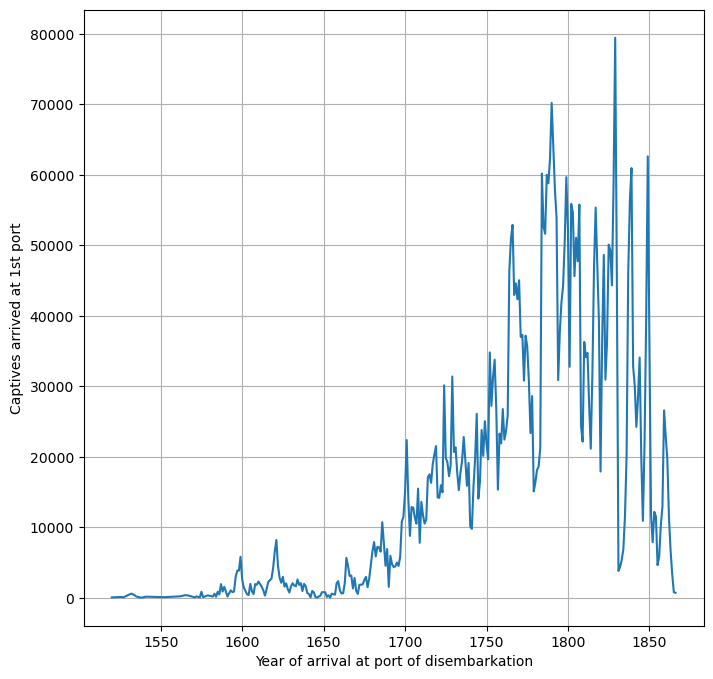

In [63]:
fig, ax = plt.subplots(1,1,figsize=(8,8))
sns.lineplot(ax=ax,x=df_per_year.index,y=df_per_year)
plt.grid()

In [64]:
max_index = df_per_year.idxmax()
min_index = df_per_year.idxmin()
print('The minimum number of captives per year is:', df_per_year[min_index],'on',min_index)
print('The maximum number of captives per year is:', df_per_year[max_index],'on',max_index)

The minimum number of captives per year is: 2.0 on 1538.0
The maximum number of captives per year is: 79472.0 on 1829.0


In [ ]:
solution = 'The total number of captives is almost constant up to 1650, with the exception of two peaks around 1600 \
and 1622. The number increases steadily up to 1800 and decreases afterwords. The times series is not smooth, but proceeds \
by low and high peek. The number of captives per year reaches its maximum on 1829 with almost 80 thousands slaves traded \
that year. The minimum is '